The value of sigma0 is 0.7806161718492721
The value of alpha is 1210.3128499724626
Pearson coefficient is 1.0000955667993006


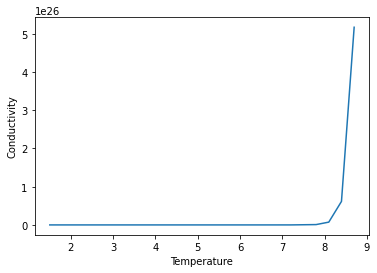

In [1]:
import matplotlib.pyplot as plt
import math
from MyLibrary import *
def linefit(x,y):
    sxx = 0
    sx = 0
    sy = 0
    sxy = 0
    n = len(x)
    for k in range(n):
        sxx += x[k]**2
        sx += x[k]
        sy += y[k]
        sxy += x[k]*y[k]
    c = [[sx,n],[sxx,sx]]
    d = [sy,sxy]
    if determinant(c)==0:
        return "no solution"
    q=gaussjordan(c,d)
    return q
def pearson(x,y):
    sxx = 0
    sx = 0
    sy = 0
    sxy = 0
    syy = 0
    n = len(x)
    for k in range(n):
        sxx += x[k]**2
        sx += x[k]
        sy += y[k]
        syy += y[k]**2
        sxy += x[k]*y[k]
    return math.sqrt(abs((sxy-n*sx*sy)**2/((sxx-n*sx**2)*(syy-n*sy**2))))
def bestSlope(p,x,y):
    sx = []
    sy = []
    for i in range(p):
        sx.append([])
        sy.append(0)
    n = len(x)
    for i in range(p):
        for j in range(p):
            sx[i].append(0)
            for k in range(n):
                sx[i][j] += x[k]**(j+i)
        for k in range(n):
            sy[i] += y[k]**i
    if determinant(sx)==0:
        return "no solution"
    u=gaussjordan(sx,sy)
    q = []
    for h in u:
        q.append(h[p])
    return q
    return q  
f=open("esem_fit1.txt","r")
lines=f.readlines()
result=[]
x = []
y = []
for k in lines:
    result.append(k.split(' ')[1])
    x.append(float(k[0]) + 0.1*float(k[2]))
    y.append(0.1*float(k[6]) + 0.01*float(k[7]))
f.close()
y1 = []
for b in y:
    y1.append(math.log(b))

#(a)
sigma0 = pow(math.e,linefit(x,y1)[0][2])           #value of sigma0
alpha = pow(math.e,linefit(x,y1)[1][2])             #value of sigma0
cond = []
for t in x:
    cond.append(sigma0*alpha**t)
print("The value of sigma0 is " + str(sigma0))
print("The value of alpha is " + str(alpha))
plt.plot(x,cond)
plt.xlabel("Temperature")
plt.ylabel("Conductivity")
print("Pearson coefficient is " + str(pearson(x,y1)))